# Interacting with Cloud Services: Proprietary vs. Open-Source

### Lab Objectives:
- Understand the difference between proprietary and open-source cloud service models.
- Use a proprietary cloud provider's SDK (AWS Boto3) to manage an object storage service (S3).
- Understand the basics of containerization with Docker.
- Compare the interaction models: imperative SDK calls vs. declarative configuration files.

## Part 1: Interacting with a Proprietary Cloud Service (AWS S3)

We'll use Amazon Web Services (AWS) as our example proprietary provider. The service we'll interact with is S3 (Simple Storage Service), a highly scalable object storage service.
### 1.1. Setup: AWS Credentials
To interact with AWS services, we need an account and security credentials.
- Create an AWS Account: If you don't have one, sign up for the AWS Free Tier. https://aws.amazon.com/free/
- Create an IAM User: For security best practices, do not use your root account credentials. Go to the IAM (Identity and Access Management) service in the AWS Console. Create a new User. Attach the AmazonS3FullAccess policy directly to the user. In the final step, create an access key. This will generate an Access Key ID and a Secret Access Key. Save these immediately and securely. We will not be able to see the secret key again.
- Configure Credentials: The Boto3 SDK (which we'll use) can be configured by creating a credentials file.
Created a folder named .aws in our home directory (~/.aws on Linux/macOS, C:\Users\USERNAME\.aws on Windows). Inside that folder, create a file named credentials.
Add your credentials to the file. path://Lab_2/.aws/credentials



> You will need credit card


- Also create a file named config in the same directory and specify a default region:


### 1.2. Interacting with S3 using Python (Boto3 SDK)


In [ ]:
# Install the AWS SDK for Python
!pip install boto3
print("✔ Boto3 library installed successfully.")

import boto3
import os
import random
import string

# --- Interacting with a Proprietary Cloud Service: AWS S3 ---

# Generate a unique bucket name, as S3 bucket names must be globally unique.
# It's a good practice to append a random string to your desired bucket name.
def generate_unique_bucket_name(prefix="my-lab2-bucket"):
    random_suffix = ''.join(random.choices(string.ascii_lowercase + string.digits, k=16))
    return f"{prefix}-{random_suffix}"

bucket_name = generate_unique_bucket_name()
file_name = "hello_aws.txt"
downloaded_file_name = "hello_aws_downloaded.txt"

print(f"--- Using AWS S3 with bucket name: {bucket_name} ---")

try:
    # 1. Create an S3 client object. Boto3 will automatically find your credentials.
    s3_client = boto3.client('s3')
    print("✔ Successfully created S3 client.")

    # 2. Create a new S3 bucket.
    # Note: For regions other than us-east-1, you must specify a LocationConstraint.
    print(f"\n--- 1. Creating bucket: {bucket_name} ---")
    s3_client.create_bucket(Bucket=bucket_name)
    print("✔ Bucket created successfully.")

    # 3. Create a dummy file and upload it.
    print(f"\n--- 2. Uploading file '{file_name}' to bucket ---")
    with open(file_name, "w") as f:
        f.write("Hello from Lab 2! This is a test file for AWS S3.")
    s3_client.upload_file(file_name, bucket_name, file_name)
    print("✔ File uploaded successfully.")

    # 4. List the objects in the bucket.
    print(f"\n--- 3. Listing objects in bucket ---")
    response = s3_client.list_objects_v2(Bucket=bucket_name)
    if 'Contents' in response:
        for obj in response['Contents']:
            print(f"- Found object: {obj['Key']}")
    else:
        print("Bucket is empty.")

    # 5. Download the file.
    print(f"\n--- 4. Downloading file '{file_name}' ---")
    s3_client.download_file(bucket_name, file_name, downloaded_file_name)
    with open(downloaded_file_name, "r") as f:
        print(f"✔ File downloaded successfully. Content: '{f.read()}'")

except Exception as e:
    print(f"❌ An error occurred: {e}")

finally:
    # 6. Clean up: Delete the object and the bucket.
    # This is VERY important to avoid unexpected charges.
    print(f"\n--- 5. Cleaning up resources ---")
    try:
        if 's3_client' in locals():
            print(f"Deleting object '{file_name}'...")
            s3_client.delete_object(Bucket=bucket_name, Key=file_name)
            print(f"Deleting bucket '{bucket_name}'...")
            s3_client.delete_bucket(Bucket=bucket_name)
            print("✔ Cleanup complete.")
        if os.path.exists(file_name):
            os.remove(file_name)
        if os.path.exists(downloaded_file_name):
            os.remove(downloaded_file_name)
    except Exception as e:
        print(f"❌ Cleanup failed: {e}")

> Here make sure to include your credentials and config in gitignore to ensure your secrect are protected


## Part 2: Interacting with Open-Source Cloud Software (Docker)

We'll focus on the foundational open-source tool that enables modern cloud-native development: **Docker**. Docker allows you to package an application and all its dependencies into a standardized, isolated unit called a container. This container can then be run consistently on any machine that has Docker installed.


### 2.1. Setup: Local Environment
Install Docker Desktop: If you haven't already, download and install Docker from the official Docker website. This single installation provides everything you need to build and run containers on your machine.
Ensure Docker Desktop is running. You should see the whale icon in your system tray or menu bar.

### 2.2. Containerizing a Web App with Docker
The process involves:
- Writing a simple web application (we'll use Flask).
- Writing a Dockerfile to describe how to build a container image of our app.
- Building the Docker image from the Dockerfile.
- Running a container from our newly created image.
- Interacting with and managing the running container.

#### Step 1: Create the Application Files
Inside the docker_test folder, we will create three files: app.py, requirements.txt, and Dockerfile.

docker_test/

├── Dockerfile

├── app.py

└── requirements.txt

In [1]:
!docker --version


Docker version 27.5.1, build 9f9e405


### Step 2: Build the Docker Image
Now that we have our Dockerfile, we can build the image. Make sure you are in the docker_test directory in your terminal.
Now we Run the docker build command:


In [13]:
!docker build -t my-flask-app:1.0 ./docker_test/


[+] Building 0.0s (0/0)  docker:desktop-linux
[+] Building 0.0s (0/1)                                    docker:desktop-linux
[+] Building 0.2s (1/2)                                    docker:desktop-linux
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 1.03kB                                     0.0s
 => [internal] load metadata for docker.io/library/python:3.9-slim         0.2s
[+] Building 0.3s (1/2)                                    docker:desktop-linux
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 1.03kB                                     0.0s
 => [internal] load metadata for docker.io/library/python:3.9-slim         0.3s
[+] Building 0.5s (1/2)                                    docker:desktop-linux
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 1.03kB                                    

### Step 3: Run the Docker Container
With our image built, we can now run it as a container using the docker run command.

In [14]:
# checking the image!
!docker images

REPOSITORY     TAG       IMAGE ID       CREATED         SIZE
my-flask-app   1.0       b87e90819be2   1 second ago    162MB
<none>         <none>    e52241b5f48e   9 minutes ago   162MB


In [15]:
# -d runs the container in detached mode (in the background)
# -p maps a port from the host to the container (host:container)
# We map our machine's port 5000 to the container's port 5000
!docker run -d -p 5000:5000 --name web-app my-flask-app:1.0

2c10a437e1368770baed4ee7f1042be9389a63c6048dad9d8c26d8d806c146ac


--name web-app gives our running container a friendly, memorable name.
The command will output a long container ID, confirming it has started.

### Step 4: Verify and Interact with the Container

Open your web browser and navigate to http://localhost:5000 we see

![Screenshot 2025-07-02 at 15.14.25.png](<attachment:Screenshot 2025-07-02 at 15.14.25.png>)

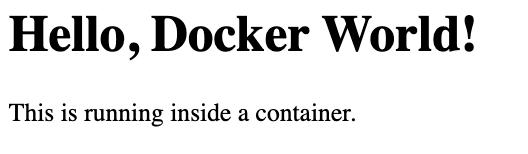

In [16]:
# See Running Containers:
!docker ps


CONTAINER ID   IMAGE              COMMAND           CREATED              STATUS              PORTS                    NAMES
2c10a437e136   my-flask-app:1.0   "python app.py"   About a minute ago   Up About a minute   0.0.0.0:5000->5000/tcp   web-app


In [17]:
# view container logs
# You can use the container name or the first few characters of its ID
!docker logs web-app

 * Serving Flask app 'app'
 * Debug mode: on
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.17.0.2:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 126-823-949
192.168.65.1 - - [02/Jul/2025 09:28:46] "GET / HTTP/1.1" 200 -
192.168.65.1 - - [02/Jul/2025 09:28:46] "GET /favicon.ico HTTP/1.1" 404 -


#### Step 4.1 if needed rebuild your Docker image

In [ ]:
# # Stop and remove the old container first if it's running
# !docker stop web-app
# !docker rm web-app

# # Rebuild the image
# !docker build -t my-flask-app:1.0 .

# # Run the new, corrected image
# !docker run -d -p 5000:5000 --name web-app my-flask-app:1.0

### Step 5: Stop and Remove the Container


In [18]:
# Stop the container when done
!docker stop web-app

web-app


In [19]:
# Remove the container:
!docker rm web-app

web-app


In [20]:
# Remove the Docker image
!docker rmi my-flask-app:1.0

Untagged: my-flask-app:1.0
Deleted: sha256:b87e90819be22e3c6399dc89d2a0cdef256565d5604606adc5ae96cf517c2d86


### Conclusion

In this lab we see both propietary and open source cloud platforms. we used AWS and Docker as an example to help us with the work. AWS is imperative programming module where we simply use the SDK to access the AWS services and interact with it. It is easy to use but it is propietary. For Opensource Cloud tool we use docker to see how to automatically build and deploy our application. 
